Changes
1. 将v[0,:],v[1,:]=v0,v0改成了v[0,:]=v0
2. 将Nt,tN=100000,10改成了Nt,tN=int(1e5),10
3. 将输出中的'半长轴=,半短轴='改为'近日点=,远日点='
4. 新增了一些参数设置的建议
5. 将一些换行变成了一些序号

Todo
<br>用矩阵进行运算,用空间换时间
<br>本程序使用的是欧拉方法求解二阶微分方程,还可以用其他二阶微分方程的数值解法计算,提高实验精度,减小参数Nt的值
<br>可以通过改变G,M,r0等参数改变行星运行的周期,这样就可以用较小的Nt与tN得到精度相同的结果,减少计算量

Debug
<br>norm=np.linalg.norm(r[i,:])错写为norm=np.linalg.norm(r[j,:])
<br>Nt设置地太小

PRO
<br>动图的实现

Explain
<br>每行数据代表一个特定时间的量,数据的列代表维度

Qus
<br>markdown如何提行,如何写得漂亮

参数设置
<br>注意M要远大于m
<br>注意Nt要设置地较大,若太小的话得到的结果会出现错误
<br>在G,M,m=1,1,0.01;Nt,tN=int(1e5),10;r0=[1,0,0]时,以下情况成立(除特殊说明)
1. v0=[0,1,0]:圆周轨道(可以通过半长轴与半段轴来验证)
2. v0=[0.5,0.7,0.5]/[0,0,0.7]:椭圆轨道($v < \sqrt2$)
3. v0=[0,np.sqrt(2),0]:抛物线轨道($v = \sqrt2$)取v0=[-1,0,1],tN=1.5时效果较好
4. v0=[0,1.42,0]/[0.1,1.4,0.2]:双曲线轨道($v > \sqrt2$),取v0=[-2.5,0.7,0.2],tN=0.5时效果较好

能量为-0.005,角动量为1.0
轨迹为椭圆
近日点=1.001052986048336,远日点=1.0


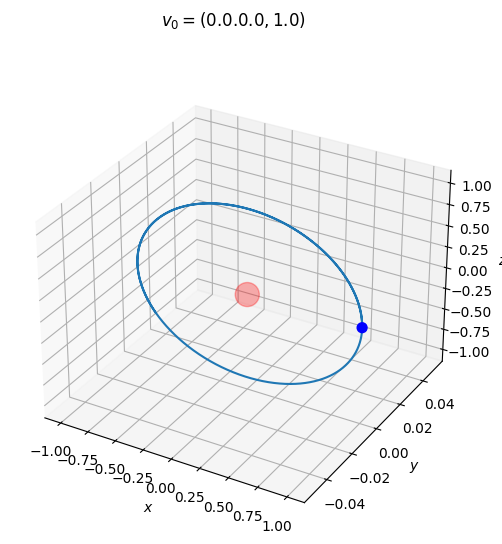

In [3]:
%reset -f
#相当于MATLAB中的clear,用于清空变量区
# [-1.4,0.2,0.1]
import numpy as np
#TODO 初始化
G,M,m=1,1,0.01
k=G*M*m
Nt,tN=int(1e5),10
# r0,v0=[1,0,0],[-2.5,0.7,0.2]#要和维数(dim/dimention)保持一致
r0,v0=[1,0,0],[0,0,1]
tlist=np.linspace(0,tN,Nt)
deltat=tlist[1]-tlist[0]
r=np.zeros((Nt,3))
v=np.zeros((Nt,3))
r[0,:]=r0
v[0,:]=v0
# v[0,:],v[1,:]=v0,v0
#TODO 计算数据
for i in range(Nt-1):
    norm=np.linalg.norm(r[i,:])
    for j in range(3):
        q=r[i,j]
        v[i+1,j]=-k*q*deltat/norm**3/m+v[i,j]#下一时刻的速度分量,注意负号表示吸引力
        deltaq=(v[i+1,j]+v[i,j])/2*deltat
        r[i+1,j]=q+deltaq#下一时刻的坐标分量
#结果分析
norm=np.sqrt(r**2@np.ones(3))
a,b=np.max(norm),np.min(norm)
v0norm,r0norm=np.linalg.norm(v0),np.linalg.norm(r0)
L=np.linalg.norm(np.cross(r0,v0))
E=0.5*m*v0norm**2-k/r0norm
print(f'能量为{E},角动量为{L}')
if E<0:
    print('轨迹为椭圆')
    print(f'近日点={a},远日点={b}')
elif E==0:
    print('轨迹为抛物线')
else:
    print('轨迹为双曲线')
#TODO 作图
import matplotlib.pyplot as plt
fig=plt.figure(figsize=(6,6))#设置大小
ax=fig.add_subplot(projection="3d")
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
ax.set_zlabel('$z$')
ax.plot(r[:,0],r[:,1],r[:,2])
ax.scatter([0,1],[0,0],[0,0],s=[300,50],c=['red','blue'])#中心天体
fig.suptitle('$v_0=(%.1f.%.1f,%.1f)$'%(v0[0],v0[1],v0[2]))
plt.show()

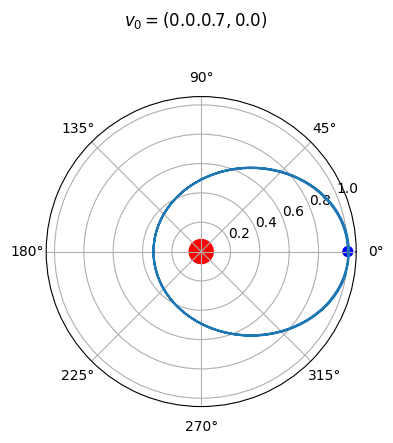

In [12]:
#极坐标作图
complex_list=r[:,0]+1j*r[:,1]
theta_list=np.angle(complex_list)
rho_list=np.abs(complex_list)
fig=plt.figure(figsize=(4,5))
ax=fig.add_subplot(projection="polar")
ax.plot(theta_list,rho_list)
ax.scatter([0,0],[0,1],s=[300,50],c=['red','blue'])
fig.suptitle('$v_0=(%.1f.%.1f,%.1f)$'%(v0[0],v0[1],v0[2]))
plt.show()

一些错误尝试
使用反三角函数,受限于定义域
tan_theta=np.divide(r[:,1],r[:,0])
theta_list=abs(np.arctan(tan_theta))
rho_list=np.sqrt(r[:,0]**2+r[:,1]**2)#是否可以通过向量范数求解?
cos_theta=np.divide(r[:,0],rho_list)
theta_list=np.arccos(cos_theta)
错误合成复数
complex_list=np.array((r[:,0],r[:,1]),dtype=complex)
theta_list=np.angle(complex_list)
rho_list=np.abs(complex_list)